In [2]:
import os
import math
import functools as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as pd

# 1- Broadcast - (I)

## 1.1- Examples
* Syntax:
  * use ```':'``` to select all indices at one dimension
  * use ```'...'``` to select all the indices in all the remaining dimensions

In [3]:
# declare variables
N, M = 6, 4

# generate N integers
np.random.seed(0)
A = np.random.randint(0, 10, (N,M))
x = np.random.randint(0, 10, (M,))
y = np.random.randint(0, 10, (N,))

# printing options
np.set_printoptions(formatter={'float': '{:<0.3f}'.format,
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# inputs:
print("Shape information:")
print("A.shape: {:>14s}".format(str(A.shape)))
print("x.shape: {:>15s}".format(str(x.shape)))
print("y.shape: {:>15s}".format(str(y.shape)))

print('-'*150)
print("A: \t"); print(A)
print("x: \t"); print(x)
print("y: \t"); print(y)

print('-'*150)
print('Subtract x from EACH row of A = A - x:'); print(A - x); print()
print('Subtract y from EACH column of A = A - y.reshape(-1,1):'); print(A - y.reshape(-1,1) ); print()
print('A - y => impossible to broadcast => error')

Shape information:
A.shape:         (6, 4)
x.shape:            (4,)
y.shape:            (6,)
------------------------------------------------------------------------------------------------------------------------------------------------------
A: 	
[[5   0   3   3  ]
 [7   9   3   5  ]
 [2   4   7   6  ]
 [8   8   1   6  ]
 [7   7   8   1  ]
 [5   9   8   9  ]]
x: 	
[4   3   0   3  ]
y: 	
[5   0   2   3   8   1  ]
------------------------------------------------------------------------------------------------------------------------------------------------------
Subtract x from EACH row of A = A - x:
[[1   -3  3   0  ]
 [3   6   3   2  ]
 [-2  1   7   3  ]
 [4   5   1   3  ]
 [3   4   8   -2 ]
 [1   6   8   6  ]]

Subtract y from EACH column of A = A - y.reshape(-1,1):
[[0   -5  -2  -2 ]
 [7   9   3   5  ]
 [0   2   5   4  ]
 [5   5   -2  3  ]
 [-1  -1  0   -7 ]
 [4   8   7   8  ]]

A - y => impossible to broadcast => error


## Question-1.
* Requirements:
  1. Compute mx = mean of values among rows of A, i.e., axis 0 or -2
  2. Compute my = mean of values among collumns of A, i.e., axis 1 or -1
  3. Subtract mx for each row in A => Sx
  4. Subtract my for each row in A => Sy
  5. Print the results as shown in the output cell
  

In [4]:
# declare variables
N, M = 6, 4

# generate N integers
np.random.seed(0)
A = np.random.randint(0, 10, (N,M))

# printing options
np.set_printoptions(formatter={'float': '{:>6.2f}'.format,
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# inputs:
print("Shape information:")
print("A.shape: {:>14s}".format(str(A.shape)))
print("x.shape: {:>15s}".format(str(x.shape)))
print("y.shape: {:>15s}".format(str(y.shape)))

print('-'*150)
print("A: \t"); print(A)
print("x: \t"); print(x)
print("y: \t"); print(y)
print('-'*150)

#YOUR CODE IS HERE

print("mx: \n", np.mean(A, axis=0))
print("my: \n", np.mean(A, axis=1))
print("Sx: \n", A - np.mean(A, axis=0))
print("Sy: \n", A - np.mean(A, axis=1).reshape(-1,1))

Shape information:
A.shape:         (6, 4)
x.shape:            (4,)
y.shape:            (6,)
------------------------------------------------------------------------------------------------------------------------------------------------------
A: 	
[[5   0   3   3  ]
 [7   9   3   5  ]
 [2   4   7   6  ]
 [8   8   1   6  ]
 [7   7   8   1  ]
 [5   9   8   9  ]]
x: 	
[4   3   0   3  ]
y: 	
[5   0   2   3   8   1  ]
------------------------------------------------------------------------------------------------------------------------------------------------------
mx: 
 [  5.67   6.17   5.00   5.00]
my: 
 [  2.75   6.00   4.75   5.75   5.75   7.75]
Sx: 
 [[ -0.67  -6.17  -2.00  -2.00]
 [  1.33   2.83  -2.00   0.00]
 [ -3.67  -2.17   2.00   1.00]
 [  2.33   1.83  -4.00   1.00]
 [  1.33   0.83   3.00  -4.00]
 [ -0.67   2.83   3.00   4.00]]
Sy: 
 [[  2.25  -2.75   0.25   0.25]
 [  1.00   3.00  -3.00  -1.00]
 [ -2.75  -0.75   2.25   1.25]
 [  2.25   2.25  -4.75   0.25]
 [  1.25   1.25   2.25

## Question-2.
* Requirements:
  * Align vector x0, x1 and x2 with axis 0, axis 1, and axis 2 of A respectively, and then multiply these vector with A.
  * Show the results as in the output cell.
  * Try to understand and explain the output


In [6]:
# declare variables
N, M, K = 5, 4, 3

# generate N integers
np.random.seed(0)
A = np.random.randint(0, 10, (N,M,K))
x2 = np.array([1, 2, 0]) # same size with axis 2 (or -1) of A
x1 = np.array([0, 1, 1, 0]) # same size with axis 1 (or -2) of A
x0 = np.array([0, 1, 0, 0, 2]) # same size with axis 0 (or -3) of A
# printing options
np.set_printoptions(formatter={'float': '{:>6.2f}'.format,
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# inputs:
print("Shape information:")
print("A.shape: {:>14s}".format(str(A.shape)))
print("x2.shape: {:>15s}".format(str(x2.shape)))
print("x1.shape: {:>15s}".format(str(x1.shape)))
print("x0.shape: {:>15s}".format(str(x0.shape)))

print('-'*150)
print("A: \t"); print(A)
print("x2: \t"); print(x2)
print("x1: \t"); print(x1)
print("x0: \t"); print(x0)
print('-'*150)

#YOUR CODE IS HERE
broadcasted_x0 = x0.reshape(-1,1,1)
broadcasted_x1 = x1.reshape(1,-1,1)
broadcasted_x2 = x2.reshape(1,1,-1)
A *= broadcasted_x0 * broadcasted_x1 * broadcasted_x2
print(A)

Shape information:
A.shape:      (5, 4, 3)
x2.shape:            (3,)
x1.shape:            (4,)
x0.shape:            (5,)
------------------------------------------------------------------------------------------------------------------------------------------------------
A: 	
[[[5   0   3  ]
  [3   7   9  ]
  [3   5   2  ]
  [4   7   6  ]]

 [[8   8   1  ]
  [6   7   7  ]
  [8   1   5  ]
  [9   8   9  ]]

 [[4   3   0  ]
  [3   5   0  ]
  [2   3   8  ]
  [1   3   3  ]]

 [[3   7   0  ]
  [1   9   9  ]
  [0   4   7  ]
  [3   2   7  ]]

 [[2   0   0  ]
  [4   5   5  ]
  [6   8   4  ]
  [1   4   9  ]]]
x2: 	
[1   2   0  ]
x1: 	
[0   1   1   0  ]
x0: 	
[0   1   0   0   2  ]
------------------------------------------------------------------------------------------------------------------------------------------------------
[[[0   0   0  ]
  [0   0   0  ]
  [0   0   0  ]
  [0   0   0  ]]

 [[0   0   0  ]
  [6   14  0  ]
  [8   2   0  ]
  [0   0   0  ]]

 [[0   0   0  ]
  [0   0   0  ]
  [0  

## Question 3
* Information:
  * ```X```:
    * rows: data samples/data points/observations
    * cols: features/variables
* Requirements:
  1. Normalize ```X``` to obtain ```X_norm1``` by
    * First, compute ```mx`` is the mean vector (np.mean) of all the samples in ```X```
    * Second, compute ```sx`` is the standard deviation (np.std) vector of all the samples in ```X```
    * Normalization by: (X - mx)/sx
  2. Normalize ```X``` by using ```StandardScaler``` of sklearn
    * Link: [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
  3. Show the results as shown in the output cell

* Guideline:
  * use ```np.allclose``` to verify the equality between two arrays.

In [8]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

X, y = load_iris(return_X_y = True)

# printing options
np.set_printoptions(formatter={'float': '{:>6.2f}'.format,
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })
# inputs:
print("Shape information:")
print("X.shape: {:<14s}".format(str(X.shape)))
print("y.shape: {:<15s}".format(str(y.shape)))
print('-'*150)

#YOUR CODE IS HERE
my_normalization = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print("Your normalization: \n", my_normalization)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print("Sklearn's normalization: \n", X_normalized)
print("Your result is same as sklearn's: ", np.allclose(my_normalization, X_normalized))

Shape information:
X.shape: (150, 4)      
y.shape: (150,)         
------------------------------------------------------------------------------------------------------------------------------------------------------
Your normalization: 
 [[ -0.90   1.02  -1.34  -1.32]
 [ -1.14  -0.13  -1.34  -1.32]
 [ -1.39   0.33  -1.40  -1.32]
 [ -1.51   0.10  -1.28  -1.32]
 [ -1.02   1.25  -1.34  -1.32]
 [ -0.54   1.94  -1.17  -1.05]
 [ -1.51   0.79  -1.34  -1.18]
 [ -1.02   0.79  -1.28  -1.32]
 [ -1.75  -0.36  -1.34  -1.32]
 [ -1.14   0.10  -1.28  -1.45]
 [ -0.54   1.48  -1.28  -1.32]
 [ -1.26   0.79  -1.23  -1.32]
 [ -1.26  -0.13  -1.34  -1.45]
 [ -1.87  -0.13  -1.51  -1.45]
 [ -0.05   2.17  -1.45  -1.32]
 [ -0.17   3.09  -1.28  -1.05]
 [ -0.54   1.94  -1.40  -1.05]
 [ -0.90   1.02  -1.34  -1.18]
 [ -0.17   1.71  -1.17  -1.18]
 [ -0.90   1.71  -1.28  -1.18]
 [ -0.54   0.79  -1.17  -1.32]
 [ -0.90   1.48  -1.28  -1.05]
 [ -1.51   1.25  -1.57  -1.32]
 [ -0.90   0.56  -1.17  -0.92]
 [ -1.26   0.79

## Question 4 (group)


### 4.1- Preparing dataset for this questions
* Run code cell in this sections for preparation

In [9]:
# Download the dataset
!rm -f images.tar.gz annotations.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
!tar -xzf images.tar.gz
!tar -xzf annotations.tar.gz

# Import libraries
import tensorflow.keras.utils as kutils

# Define functions
def show_images(image, label, image_title, label_title):
  plt.figure(figsize=(10,5))
  ax = plt.subplot(1,2,1)
  ax.imshow(image)
  ax.set_axis_off()
  ax.set_title(image_title)

  ax = plt.subplot(1,2,2)
  ax.imshow(label, cmap='gray')
  ax.set_axis_off()
  ax.set_title(label_title)
  plt.show()

def show_image(image, title, figsize=None):
  if figsize is not None:
    plt.figure(figsize=figsize)
  else:
    plt.figure()
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)


--2024-04-05 08:17:51--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz [following]
--2024-04-05 08:17:52--  https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  19.3MB/s    in 39s     

2024-04-05 08:18:31 (19.3 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2024-04-05 08:18:31--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.

### 4.2- Showing a demo
* Run code cell in this section to have a demonstration

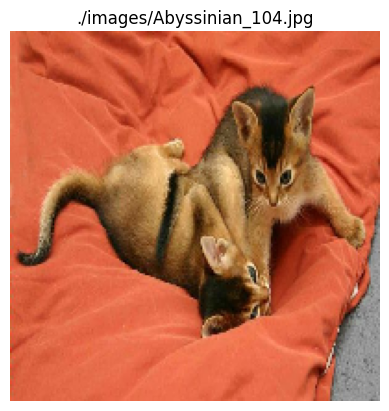

In [10]:
image_file = './images/Abyssinian_104.jpg'
batch_files = [
    './images/Abyssinian_10.jpg',
    './images/Bengal_10.jpg',
    './images/Birman_10.jpg',
    './images/Bombay_10.jpg',
]
shape = (200, 200)

image = np.asarray(kutils.load_img(image_file, target_size=shape, color_mode='rgb'))
batch_data = [\
    np.expand_dims(np.asarray(kutils.load_img(file, target_size=shape, color_mode='rgb')),
                   axis=0)
    for file in batch_files
]
batch_data = np.concatenate(batch_data, axis=0)
show_image(image, image_file)

### Question 4.1- Normalize image for each channel by substracting mean and deviding for std
* Information:
  * image is an 3D-array, shape: (200, 200, 3)
  * The third dimension is called, channel of image
  * channel=3 means that we have color image with 3-channels: called red (index:0), green (index:1)and blue (index:2)
* Requirements:
  1. Normalize (Standardize) ```image``` for each channel by subtracting mean and deviding for std.
  2. Show the results as in the output cell below

  

In [11]:
#YOUR CODE IS HERE

print("After normalization, new mean= ", np.mean(image, axis=(0,1)))
print("After normalization, new std= ", np.std(image, axis=(0,1)))

After normalization, new mean=  [191.87  98.26  64.78]
After normalization, new std=  [ 55.02  32.94  29.30]


### Question 4.2 - Normalization with different types
* Information:
  * ```batch_data```: 4D-array of shape (N,H,W,C)
    * N (axis 0 or -4): number of images or batch-size
    * H  (axis 1 or -3): number of rows in each image
    * W  (axis 2 or -2): number of cols in each image
    * C  (axis 3 or -1): number of channels (now, 3)
  * In this question:
    * Normalization means that (X - mean)/std
      * **Important note**: after normalization, the mean and the std of X is near to **0** and **1** respecively
    * However,
      * batch-norm: mean and std are estimated from axis (0,1,2); i.e.,
        * ```X.mean(axis=(0,1,2))```
        * ```X.std(axis=(0,1,2))```
      * layer-norm: mean and std are estimated from axis (1,2,3)
      * instance-norm: mean and std are estimated from axis (1,2)
* Requirement:
  * Fill code for ```batch_norm```, ```layer_norm```, and ```instance_norm```
  * Fill code for ```batch_mean_std```, ```layer_mean_std```, ```instance_mean_std``` to estimate mean and std for after calling to each kind of normalization

In [12]:
batch_data.shape

(4, 200, 200, 3)

In [14]:
def batch_norm(X):
  #YOUR CODE IS HERE
  ret_X = (X - np.mean(X, axis=(0,1,2))) / np.std(X, axis=(0,1,2))
  return ret_X

def batch_mean_std(X):
  #YOUR CODE IS HERE

  return np.mean(X, axis=(0,1,2)), np.std(X, axis=(0,1,2))

np.set_printoptions(formatter={'float': '{:>6.2f}'.format,
                                'int': '{:<3d}'.format,
                                'bool': '{:<3}'.format })

#
mu, sigma = batch_mean_std(batch_norm(batch_data))
print("After batch_norm, mean: ", mu)
print("After batch_norm, std: ", sigma)

After batch_norm, mean:  [  0.00   0.00   0.00]
After batch_norm, std:  [  1.00   1.00   1.00]


In [15]:
def layer_norm(X):
  #YOUR CODE IS HERE
  ret_X = (X - np.mean(X, axis=(1,2,3)).reshape(-1,1,1,1)) / np.std(X, axis=(1,2,3)).reshape(-1,1,1,1)
  return ret_X


def layer_mean_std(X):
  #YOUR CODE IS HERE
  return np.mean(X, axis=(1,2,3)), np.std(X, axis=(1,2,3))
#
mu, sigma = layer_mean_std(layer_norm(batch_data))
print("After layer_norm, mean: ", mu)
print("After layer_norm, std: ", sigma)

After layer_norm, mean:  [  0.00  -0.00  -0.00  -0.00]
After layer_norm, std:  [  1.00   1.00   1.00   1.00]


In [16]:
def instance_norm(X):
  #YOUR CODE IS HERE
  ret_X = (X - np.mean(X, axis=(1,2)).reshape(-1,1,1,3)) / np.std(X, axis=(1,2)).reshape(-1,1,1,3)
  return ret_X


def instance_mean_std(X):
  #YOUR CODE IS HERE
  return np.mean(X, axis=(1,2)), np.std(X, axis=(1,2))

#
mu, sigma = instance_mean_std(instance_norm(batch_data))
print("After instance-norm, mean: "); print(mu)
print("After instance-norm, std: "); print(sigma)

After instance-norm, mean: 
[[ -0.00   0.00   0.00]
 [  0.00  -0.00   0.00]
 [  0.00  -0.00  -0.00]
 [ -0.00   0.00   0.00]]
After instance-norm, std: 
[[  1.00   1.00   1.00]
 [  1.00   1.00   1.00]
 [  1.00   1.00   1.00]
 [  1.00   1.00   1.00]]


# 2- Broadcast -(II)

## 2.1 - Examples

In [17]:
A = np.array(
    [
        [0, 2],
        [2, 2],
        [1, 0]
    ]
)
B = np.array(
    [
        [-1, -2],
        [-3, -3]
    ]
)
"""
for each point Pa in A,
  for each point Pb in B
    compute the Euclid distance between Pa and Pb

Results:
  Matrix D, shape (3,2)
    * 3: number of points in A
    * 2: number of points in B
"""
AA = np.expand_dims(A, axis=1) # (3, 2) => (3, 1, 2)
BB = np.expand_dims(B, axis=0) # (2, 2) => (1, 2, 2)
CC = AA - BB # (3,2,2)
D = np.sqrt((CC**2).sum(axis=-1)) #(3, 2)
print("A.shape: {:>15s}".format(str(A.shape)) )
print("B.shape: {:>15s}".format(str(B.shape)) )
print('-'*150)
print("AA.shape: {:>15s}".format(str(AA.shape)) )
print("BB.shape: {:>15s}".format(str(BB.shape)) )
print('-'*50)
print("CC.shape: {:>15s}".format(str(CC.shape)) )
print("DD.shape: {:>15s}".format(str(D.shape)) )
print("D = "); print(D)
print("Meaning:")
print("Distance({:8s}, {:8s}) = {:5.2f}".format(str(A[0]), str(B[0]), D[0, 0] ))
print("Distance({:8s}, {:8s}) = {:5.2f}".format(str(A[0]), str(B[1]), D[0, 1] ))
print("Distance({:8s}, {:8s}) = {:5.2f}".format(str(A[1]), str(B[0]), D[1, 0] ))
print("Distance({:8s}, {:8s}) = {:5.2f}".format(str(A[1]), str(B[1]), D[1, 1] ))

A.shape:          (3, 2)
B.shape:          (2, 2)
------------------------------------------------------------------------------------------------------------------------------------------------------
AA.shape:       (3, 1, 2)
BB.shape:       (1, 2, 2)
--------------------------------------------------
CC.shape:       (3, 2, 2)
DD.shape:          (3, 2)
D = 
[[  4.12   5.83]
 [  5.00   7.07]
 [  2.83   5.00]]
Meaning:
Distance([0   2  ], [-1  -2 ]) =  4.12
Distance([0   2  ], [-3  -3 ]) =  5.83
Distance([2   2  ], [-1  -2 ]) =  5.00
Distance([2   2  ], [-3  -3 ]) =  7.07


## Question 1-

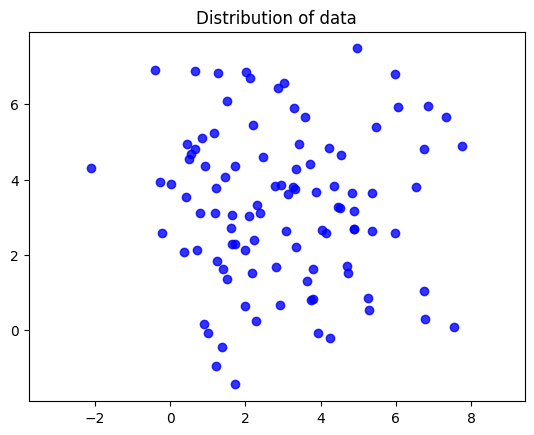

In [18]:
# Input data

# Declare variables
mu = [3, 3]
sigma = 2
N = 100

np.random.seed(0)
X = np.random.normal(mu, sigma, (N, 2))

plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker='o', color='blue', alpha=0.8)
plt.title('Distribution of data')
plt.axis("equal")
plt.show()


* Requirements: Fill code to the cell followed to:
  1. Estimate the mean (named ```center```) from the points in X
  2. Compute the distance (Euclid) from each point in X to ```center```
  3. Use ```np.percentile``` to determine the radius of the cirlce that contains 75% of points in X
  4. Draw the figure as shown below
    * Link to example, drawing circle: [https://www.pythonpool.com/matplotlib-circle/](https://www.pythonpool.com/matplotlib-circle/)

Center (estimated mean):  [  3.00   3.29]
Radius:   3.37


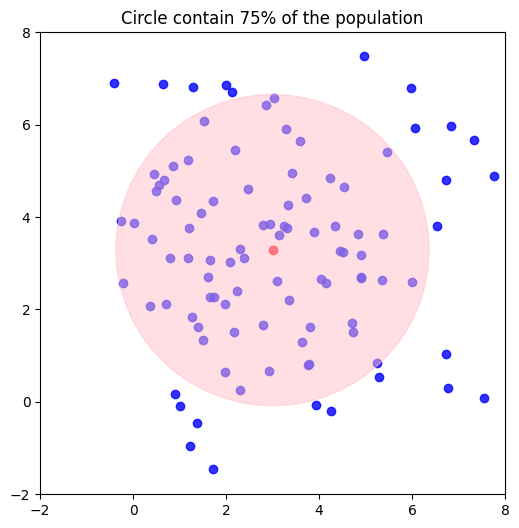

In [22]:

# YOUR CODE IS HERE

center = X.mean(axis=0)
dist_X_center = np.sqrt(((X - center)**2).sum(axis=1))
radius = np.percentile(dist_X_center, 75)

print("Center (estimated mean): ", center)
print("Radius:  {:>5.2f}".format(radius))
# draw
plt.figure(figsize=(6,6))
plt.xlim(-2, 8)
plt.ylim(-2, 8)
plt.scatter(X[:, 0], X[:, 1], marker='o', color='blue', alpha=0.8)
plt.scatter(center[0], center[1], marker='o', color='red', alpha=0.8)
circle = plt.Circle(center, radius, color='pink', fill=True, alpha=0.5)
plt.gca().add_artist(circle)
plt.title('Circle contain 75% of the population')
plt.show()

## Question 2-

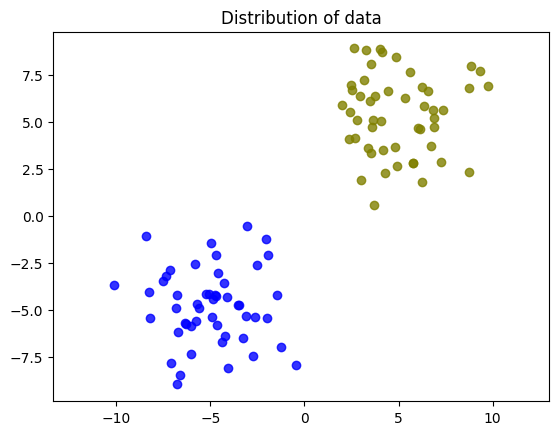

In [23]:
# Input data

# Declare variables
mu1, mu2 = [-5, -5], [5, 5]
sigma1, sigma2 = 2, 2
N1, N2 = 50, 50

np.random.seed(0)
X1 = np.random.normal(mu1, sigma1, (N1, 2))
X2 = np.random.normal(mu2, sigma2, (N2, 2))

plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker='o', color='blue', alpha=0.8)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', color='olive', alpha=0.8)
plt.title('Distribution of data')
plt.axis("equal")
plt.show()

* Requirements:
  1. Compute the distance between each point in X1 to each point in X2
  2. Determine the nearest pair, consisting a point in X1 and a point in X2. This pair is named as ```nearest```
    * Note: ```nearest.shape = (2,2)```:
      * the first row: a point in X1
      * the second row: a point in X2
  3. Determine the farthest pair, consisting a point in X1 and a point in X2. This pair is named as ```farthest```
    * Note: ```farthest.shape = (2,2)```:
      * the first row: a point in X1
      * the second row: a point in X2

  * Guidelines:
    * D is (50, 50): distance for each point in X1 (rows) to each point in X2 (cols)
    * ```np.argmin, np.argmax```: return the index (in 1D) of the shorted and the longest distance.
    * ```np.unravel_index(np.argmin(.), D.shape)``` => return (row-in-X1, row-in-X2)
    * ```np.unravel_index(np.argmax(.), D.shape)``` => return (row-in-X1, row-in-X2)


In [24]:
# YOUR CODE IS HERE
dist_matrix = np.sqrt(((X1[:, None] - X2)**2).sum(axis=-1))
nearest_dist = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)
farthest_dist = np.unravel_index(np.argmax(dist_matrix), dist_matrix.shape)

nearest = np.stack((X1[nearest_dist[0]], X2[nearest_dist[1]]), axis=0)
farthest = np.stack((X1[farthest_dist[0]], X2[farthest_dist[1]]), axis=0)


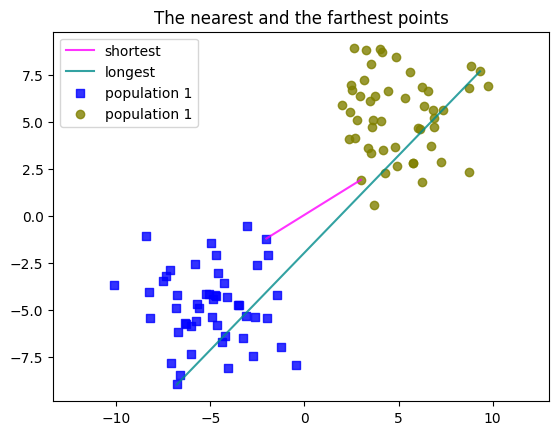

In [25]:
# RUN this cell to show the picture
# Assume that nearest and farthest already computed.

plt.figure()
plt.plot(nearest[:, 0], nearest[:, 1], color='magenta', alpha=0.8, label="shortest")
plt.plot(farthest[:, 0], farthest[:, 1], color='darkcyan', alpha=0.8, label="longest")
plt.scatter(X1[:, 0], X1[:, 1], marker='s', color='blue', alpha=0.8, label="population 1")
plt.scatter(X2[:, 0], X2[:, 1], marker='o', color='olive', alpha=0.8, label="population 1")
plt.title('The nearest and the farthest points')
plt.axis("equal")
plt.legend()
plt.show()

# 3- Broadcast-(II)
  * Solve the questions in file ```knn.ipynb``` (attached)